In [ ]:
# Starting to explore stability of commodities using shipping data in the BKB dataset
# 24.07.2024
# vera.provatorova@dh.huc.knaw.nl

<a class="anchor" id="start"></a>

## Steps:
* [Read the data](#read-data)
* [Convert prices to decimal](#convert-values)
* [Aggregate the data](#aggregate)
* [Connect the commodities with GLOBALISE thesaurus](#globalise)
* [Calculate variation coefficients](#calculate-variation)
* [Explore the results](#explore-results)
* [Plot selected commodities per decade](#plot-commodities)



### Read the data <a class="anchor" id="read-data"></a>

In [1]:
DATA_DIR = 'data/' # change the path when running to point to your data directory

In [2]:
# First step: read the BKB data
import glob
import pandas as pd
from os.path import splitext, basename

def get_name(path):
    '''
    in: path/to/data/bgb_cargo.tsv
    out: cargo
    '''
    root, ext = splitext(path) # 'path/to/data/bgb_cargo.tsv' -> 'path/to/data/bgb_cargo', '.tsv'
    return basename(root).split('_')[-1] # 'path/to/data/bgb_cargo' -> 'bgb_cargo' -> 'cargo'

bkb_data = {get_name(path): pd.read_csv(path,sep='\t',low_memory=False) 
           for path in glob.glob(DATA_DIR+'bkb_cargo_logs/*')} # we assume the sheets are stored separately as .tsv files

In [7]:
# Display the data
from IPython.display import display
for key, df in bkb_data.items():
    print(key+':')
    display(df.head(3))

ship:


,id,naam,added_when,added_by,timestamp
0,3067,Vrouwe Agatha,5/21/08 15:37,mjo,5/21/08 15:37
1,3076,Faam,5/22/08 11:28,mjo,5/22/08 11:28
2,3065,Dordrecht,5/21/08 15:07,mjo,5/21/08 15:07


source:


,id,naam,added_when,added_by,timestamp
0,105,10758.0,5/6/08 11:47,admin,4/9/08 16:55
1,104,10757.0,5/6/08 11:47,admin,4/9/08 16:55
2,103,10756.0,5/6/08 11:47,admin,4/9/08 16:55


relVoyageShip:


,id,voyId,shipId,timestamp,DAS_voyage,DAS_shipID
0,46,99359.0,3070,5/21/08 16:52,95688.0,DAS_ship0660
1,51,99365.0,3077,5/22/08 11:48,95666.0,DAS_ship1806
2,49,99362.0,3074,5/22/08 10:47,95694.0,DAS_ship0496


regio:


,id,naam,added_when,added_by,timestamp
0,3059,Kaap de Goede Hoop,5/6/08 11:46,Admin,5/6/08 11:47
1,3061,Mauritius,5/6/08 11:46,Admin,5/6/08 11:47
2,3062,Mokka,5/6/08 11:46,Admin,5/6/08 11:47


unit:


,id,naam,added_when,added_by,timestamp
0,88,pees,5/21/08 10:03,jsc,5/21/08 10:03
1,52,aam,4/9/08 16:38,Admin,4/9/08 16:39
2,54,balie,4/9/08 16:38,Admin,4/9/08 16:39


place:


,id,naam,added_when,added_by,timestamp,regio,voc_place_ID,standardized toponym,URI,lat,long
0,902,Kupang,5/6/08 11:43,Admin,5/6/08 11:44,3169.0,vocUniquePlaceID_5164,Kupang ID,http://sws.geonames.org/2057087/,-10.17083,123.60694
1,903,Pontianak,5/6/08 11:43,Admin,5/6/08 11:44,3171.0,vocUniquePlaceID_5165,Pontianak ID,http://sws.geonames.org/1630789/,-0.03194,109.32500
2,900,Kisar,5/6/08 11:43,Admin,5/6/08 11:44,3162.0,vocUniquePlaceID_5166,Pulau Kisar ID,http://sws.geonames.org/1639966/,-8.06112,127.18200


product:


,id,naam,added_when,added_by,timestamp
0,1196,spreien,5/6/08 11:52,Admin,5/6/08 11:54
1,1195,spijker,5/6/08 11:52,Admin,1/9/13 13:36
2,4313,speciestok,9/26/12 14:56,Admin,9/26/12 14:56


voyage:


,url,voyId,voyBookingDay,voyBookingMonth,voyBookingYear,voyDeparturePlaceId,voyDepartureDay,voyDepartureMonth,voyDepartureYear,voyArrivalPlaceId,...,timestamp,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields,first_ship_name
0,https://bgb.huygens.knaw.nl/bgb/voyage/1,99351,NaN,NaN,1790,934.0,NaN,NaN,NaN,861.0,...,2013-09-10 14:30:24,147.0,1,NaN,NaN,3185,3129,3,1 Batavia Batavia Amsterdam Republiek 1789 1...,Juffrouw Johanna
1,https://bgb.huygens.knaw.nl/bgb/voyage/2,99352,NaN,NaN,1790,934.0,NaN,NaN,NaN,861.0,...,2013-09-10 14:30:24,147.0,2,NaN,NaN,3185,3129,3,2 Batavia Batavia Amsterdam Republiek 1789 1...,Draak
2,https://bgb.huygens.knaw.nl/bgb/voyage/3,99353,NaN,NaN,1790,934.0,NaN,NaN,NaN,861.0,...,2013-09-10 14:30:24,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank


cargo:


,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,carValueLicht,carValueLichtGuldens,carValueLichtStuivers,carValueLichtPenningen,carRemarks,carOrder,changed_when,changed_by,timestamp,all_fields
0,645880,99353,1290.0,NaN,NaN,NaN,NaN,"1.623,30",1623.0,3.0,...,NaN,NaN,NaN,NaN,NaN,9.0,6/25/08 12:42,jsc,8/5/13 10:50,samen
1,645881,99353,1230.0,848.0,88.0,4,4,"371,8",371.0,8.0,...,NaN,NaN,NaN,NaN,NaN,10.0,5/21/08 14:41,mjo,8/5/13 10:50,"zakhorloge zilveren, voor Japan pees"
2,645877,99353,1133.0,16295.0,88.0,4,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,2/25/13 10:09,DorineS,8/5/13 10:50,"moir√© gouden, voor Japan pees"


specification:


,id,naam,added_when,added_by,timestamp
0,652,tot inktkokers,5/6/08 11:55,Admin,3/13/13 15:27
1,15877,Constantia rood,2/6/13 16:30,DorineS,2/6/13 16:30
2,654,arduinen,5/6/08 11:55,Admin,5/6/08 11:55


In [4]:
df_cargo.columns

Index(['carId', 'carVoyageId', 'carProductId', 'carSpecificationId', 'carUnit',
       'carQuantity', 'carQuantityNumeric', 'carValue', 'carValueGuldens',
       'carValueStuivers', 'carValuePenningen', 'carValueLicht',
       'carValueLichtGuldens', 'carValueLichtStuivers',
       'carValueLichtPenningen', 'carRemarks', 'carOrder', 'changed_when',
       'changed_by', 'timestamp', 'all_fields'],
      dtype='object')

### Convert price to decimal <a class="anchor" id="convert-values"></a>

#### [Go to top](#start)

In [5]:
# Preparing the data
df_cargo = bkb_data['cargo'].dropna(subset=['carValueGuldens','carProductId','carVoyageId'])
df_product = bkb_data['product'].dropna(subset=['id'])
df_voyage = bkb_data['voyage'].dropna(subset=['voyId','voyDepartureYear'])
df_specification = bkb_data['specification']

In [8]:
def price_to_decimal(guldens, stuivers, penningen): 
    '''
    stuiver = 1/20 gulden
    penning = 1/16 stuiver
    '''
    total_guldens = guldens + (stuivers / 20) + (penningen / (20 * 16))
    return total_guldens
    

In [9]:
import numpy as np

df_product['id'] = df_product['id'].astype(int)
df_voyage['voyId'] = df_voyage['voyId'].astype(str)
df_voyage['voyDepartureYear'] = df_voyage['voyDepartureYear'].astype(int)
df_specification['id'] = pd.to_numeric(df_specification['id'],errors='coerce')
df_cargo['carValueStuivers'] = df_cargo['carValueStuivers'].fillna(0)
df_cargo['carValuePenningen'] = df_cargo['carValuePenningen'].fillna(0)
df_cargo['carValueConverted'] = df_cargo.apply(lambda row: price_to_decimal(row['carValueGuldens'],
                                                                               row['carValueStuivers'],
                                                                               row['carValuePenningen']),
                                                axis=1)

/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_33556/2092254653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voyage['voyId'] = df_voyage['voyId'].astype(str)
/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_33556/2092254653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voyage['voyDepartureYear'] = df_voyage['voyDepartureYear'].astype(int)
/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_33556/2092254653.py:7: SettingWithCopyWarning: 
A value is trying to be

### Aggregate the data <a class="anchor" id="aggregate"></a>
#### [Go to top](#start)

In [11]:
# Merge cargo with product and voyage data
df_merged = df_cargo.merge(df_product, left_on='carProductId', right_on='id', how='left')\
                    .merge(df_voyage, left_on='carVoyageId', right_on='voyId', how='left').dropna(subset=['voyDepartureYear'])

df_merged.head()

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,timestamp,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
311,646292,99379,1034.0,731.0,69.0,1.078,1078,"533,12",533.0,12.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk
312,646293,99379,1128.0,NaN,69.0,141,141,"176,8",176.0,8.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk
313,646294,99379,1140.0,NaN,69.0,4.301,4301,"709,13",709.0,13.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk
314,646295,99379,1156.0,852.0,69.0,61.984,61984,"7.611,14",7611.0,14.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk
315,646296,99379,1156.0,838.0,69.0,6.250,6250,"1413,9",1413.0,9.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk


In [13]:
missing_specification_ids = set()
def get_specification(cargo_id):
    df_target = df_specification[df_specification['id']==cargo_id]
    if len(df_target)>0:
        return df_target.iloc[0]['naam']
    # If we're here, the specification was not found
    missing_specification_ids.add(cargo_id)
    return ''
df_merged['nameComplete'] = df_merged.apply(lambda row: row['naam'] if pd.isna(row['carSpecificationId'])
                                           else row['naam'] + ' ' + get_specification(row['carSpecificationId']),
                                           axis=1)
df_merged['nameComplete'] = df_merged['nameComplete'].map(lambda x: x.strip())
print('Warning: specifications not found for: ', missing_specification_ids)

In [34]:
df_merged['decade'] = df_merged['voyDepartureYear'].map(lambda x: str(int((x //10)*10))+'s')

In [36]:
df_merged_clean = df_merged[['naam','carValueConverted','carVoyageId',
                            'voyDepartureYear','decade']].drop_duplicates()

df_merged_clean['total_value'] = df_merged_clean.groupby('naam')['carValueConverted'].transform('sum') # or nameComplete for specifications
df_merged_clean=df_merged_clean.sort_values(by='naam')
df_merged_clean.head()

,naam,carValueConverted,carVoyageId,voyDepartureYear,decade,total_value
49865,'s lands recht,1926.400,114490,1712.0,1710s,1926.400
17045,aam,96.000,101399,1783.0,1780s,256.725
59893,aam,160.725,118198,1785.0,1780s,256.725
37227,aamschoof,13.750,104716,1779.0,1770s,13.750
25443,aardolie,12.375,102504,1777.0,1770s,2698.050


### Connect the commodities with the GLOBALISE thesaurus <a class="anchor" id="globalise"></a>
#### [Go to top](#start)

In [54]:
# Connecting with the GLOBALISE commodities
import json

# First, get a list of all labels of commodities to filter our data
commodities_raw = json.load(open('data/commoditiesV1.json','r')) # Data available at: https://globalise-data.diginfra.net/sparql
commodities_labels_list_flat = sum([[item['prefLabelNL']['value']]+[label for label in item['altLabelsNL']['value'].split('; ') if label]
                                     for item in commodities_raw['results']['bindings']],
                                    [])
commodities_labels_set = set([label.lower() for label in commodities_labels_list_flat])

# Next, get categories per commodity
parent_uri = {item['concept']['value']:
             item['concept_broader']['value']
             for item in commodities_raw['results']['bindings']
             if 'concept_broader' in item}

name_by_uri = {item['concept']['value']:
             item['prefLabelNL']['value']
             for item in commodities_raw['results']['bindings']}

uri_by_name = {label.lower():
             item['concept']['value']
               for item in commodities_raw['results']['bindings']
              for label in [item['prefLabelNL']['value']]+[lbl for lbl in item['altLabelsNL']['value'].split('; ') if lbl]
             }


def get_category_chain(url='', cur_label='', chain=[]):
    '''
    Recursively looking for nested categories in the thesaurus
    '''
    if not url:
        url = uri_by_name[cur_label]
    if url not in parent_uri: # can't go any higher
        return [cur_label]
    new_url = parent_uri[url]
    new_label = name_by_uri[new_url] if new_url in name_by_uri else name_by_uri[url]
    return [cur_label] + get_category_chain(new_url, new_label)

def get_category_chain_by_name(label):
    return get_category_chain(url='',cur_label=label)

def get_category_by_name(label):
    chain = get_category_chain_by_name(label)
    if chain[-1].startswith('Verwerkte'): # too broad, narrow down
        return chain[-2]
    if chain[-1].startswith('Voedsel'): # too broad
        return chain[-2]
    if chain[-1].startswith('Koffie, thee,'): # also too broad, we want tea
        return chain[-2]
    return chain[-1]

In [55]:
% # Remove this line to test the function

print(get_category_by_name('opium'))

print(get_category_chain_by_name('laken'))

UsageError: Line magic function `%` not found.


In [56]:
filtered_df = df_merged_clean[df_merged_clean['naam'].isin(commodities_labels_set)]
filtered_df['category'] = filtered_df['naam'].map(get_category_by_name)
filtered_df.head()

/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_33556/1920359566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['category'] = filtered_df['naam'].map(get_category_by_name)


,naam,carValueConverted,carVoyageId,voyDepartureYear,decade,total_value,category
17045,aam,96.000,101399,1783.0,1780s,256.725,"Reisgoederen, handtassen en vergelijkbare cont..."
59893,aam,160.725,118198,1785.0,1780s,256.725,"Reisgoederen, handtassen en vergelijkbare cont..."
37227,aamschoof,13.750,104716,1779.0,1770s,13.750,Onderdelen
25443,aardolie,12.375,102504,1777.0,1770s,2698.050,"Minerale brandstoffen, smeermiddelen en gerela..."
59051,aardolie,93.575,118129,1785.0,1780s,2698.050,"Minerale brandstoffen, smeermiddelen en gerela..."


### Calculate variation coefficients <a class="anchor" id="calculate-variation"></a>
#### [Go to top](#start)

In [57]:
import numpy as np
def std(x): return np.std(x) # default std in pandas returns NaN with 1 sample, we don't want this


# Group by product and time period to get value by decade

df_grouped = filtered_df.groupby(['naam', 'category', 'decade']).agg({'carValueConverted': ['mean',std]}).reset_index()
# Flatten the column names
df_grouped.columns = ['commodity','category', 'decade', 'mean_value', 'std_dev_value']

df_grouped.head()

,commodity,category,decade,mean_value,std_dev_value
0,aam,"Reisgoederen, handtassen en vergelijkbare cont...",1780s,128.362500,32.362500
1,aamschoof,Onderdelen,1770s,13.750000,0.000000
2,aardolie,"Minerale brandstoffen, smeermiddelen en gerela...",1760s,111.075000,0.000000
3,aardolie,"Minerale brandstoffen, smeermiddelen en gerela...",1770s,87.598333,59.329382
4,aardolie,"Minerale brandstoffen, smeermiddelen en gerela...",1780s,89.214286,61.367186


In [59]:
df_grouped = df_grouped[df_grouped['mean_value']>0] # some commodities have price 0

# Fill NaNs in std_dev_value with 0
df_grouped['std_dev_value'] = df_grouped['std_dev_value'].fillna(0)

# Calculate coefficient of variation (CV)
df_grouped['cv_value'] = df_grouped['std_dev_value'] / df_grouped['mean_value']
df_grouped

,commodity,category,decade,mean_value,std_dev_value,cv_value
0,aam,"Reisgoederen, handtassen en vergelijkbare cont...",1780s,128.362500,32.362500,0.252118
1,aamschoof,Onderdelen,1770s,13.750000,0.000000,0.000000
2,aardolie,"Minerale brandstoffen, smeermiddelen en gerela...",1760s,111.075000,0.000000,0.000000
3,aardolie,"Minerale brandstoffen, smeermiddelen en gerela...",1770s,87.598333,59.329382,0.677289
4,aardolie,"Minerale brandstoffen, smeermiddelen en gerela...",1780s,89.214286,61.367186,0.687863
...,...,...,...,...,...,...
1701,zwartsel,"Chemicaliën en verwante producten, n.e.g.",1770s,83.125000,76.875000,0.924812
1702,zwartsel,"Chemicaliën en verwante producten, n.e.g.",1780s,13.725000,0.000000,0.000000
1703,zwavel,"Chemicaliën en verwante producten, n.e.g.",1770s,126.516667,75.490091,0.596681
1704,zwavel,"Chemicaliën en verwante producten, n.e.g.",1780s,299.568750,268.265745,0.895506


In [73]:
df_grouped = df_grouped[df_grouped['commodity'].str.find('gewicht')==-1] # removing 'gewicht', not a commodity
df_grouped = df_grouped[df_grouped['commodity'].str.find('in aanrekening')==-1] # removing 'in aanrekening', not a commodity

### Explore the results <a class="anchor" id="explore-results"></a>
#### [Go to top](#start)

In [74]:
# volatility per category
df_grouped.groupby('category')['cv_value'].mean().reset_index().sort_values('cv_value').reset_index().drop('index',axis=1)[::-1]

,category,cv_value
46,wapenkamergoederen,1.770136
45,ambachtsgoederen,1.410067
44,gereedschap,1.291103
43,"Suikers, suikerbereidingen en honing",1.204649
42,Non-ferrometalen,1.084429
41,Vergoedingen en geldbedragen met een specifiek...,1.008722
40,vaatwerk,0.947195
39,provisie,0.876345
38,"Koffie, thee, cacao, specerijen, en fabrikaten...",0.825167
37,kramerij,0.796895


In [62]:
# Per commodity

In [75]:
df_volatility = df_grouped.groupby('commodity')['cv_value'].mean().reset_index()


In [76]:
df_volatility = df_volatility.sort_values('cv_value').reset_index().drop('index',axis=1)

In [77]:
df_volatility.tail(30)[::-1]

,commodity,cv_value
758,gom,2.208884
757,pakgaren,1.956893
756,wapenkamergoederen,1.770136
755,tarwe,1.567866
754,laken,1.567165
753,koper,1.542034
752,guni,1.482090
751,tin,1.468362
750,ongelden,1.445789
749,drank,1.435886


In [79]:
df_volatility[df_volatility['commodity']=='opium']

,commodity,cv_value
708,opium,1.09264


In [80]:
df_volatility.describe()

,cv_value
count,759.000000
mean,0.381670
std,0.409633
min,0.000000
25%,0.000000
50%,0.314897
75%,0.650122
max,2.208884


In [85]:
from scipy import stats

stats.percentileofscore(df_volatility['cv_value'], 1.093)

93.41238471673255

In [86]:
df_volatility.quantile(0.93,numeric_only=True)

cv_value    1.076724
Name: 0.93, dtype: float64

In [88]:
len(df_volatility[df_volatility['cv_value']>1.08])

53

### Plot selected commodities per decade <a class="anchor" id="plot-commodities"></a>
#### [Go to top](#start)

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
metrics = {
    'price': 'carValueConverted'
}
def plot_commodity(name, metric='price'):
    df_target = filtered_df[filtered_df['naam']==name]
    pivot_df = df_target.pivot_table(index='decade', columns='voyDepartureYear', values=metrics[metric], aggfunc='sum', fill_value=0)

    # Plotting the stacked bar plot
    pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.ylabel('Total {0}'.format(metric))
    plt.xlabel('Decade')
    plt.legend(title='Commodity')
    plt.legend(title='Total {0} of {1} per decade, stacked by year'.format(metric,name),
               bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # Display the plot
    plt.show()

In [106]:
filtered_df[filtered_df['naam']=='opium'].sort_values('voyDepartureYear')

,naam,carValueConverted,carVoyageId,voyDepartureYear,decade,total_value,category
30084,opium,613.300,103040,1772.0,1770s,294231.325,Dranken en Tabak
39291,opium,1146.850,105522,1773.0,1770s,294231.325,Dranken en Tabak
42099,opium,1143.800,108669,1774.0,1770s,294231.325,Dranken en Tabak
25968,opium,617.325,102555,1775.0,1770s,294231.325,Dranken en Tabak
26979,opium,1101.975,102633,1777.0,1770s,294231.325,Dranken en Tabak
19446,opium,934.925,101717,1778.0,1770s,294231.325,Dranken en Tabak
36837,opium,1125.925,104614,1778.0,1770s,294231.325,Dranken en Tabak
12140,opium,556.925,100771,1780.0,1780s,294231.325,Dranken en Tabak
13745,opium,2407.200,100964,1781.0,1780s,294231.325,Dranken en Tabak
7804,opium,1584.000,100204,1783.0,1780s,294231.325,Dranken en Tabak


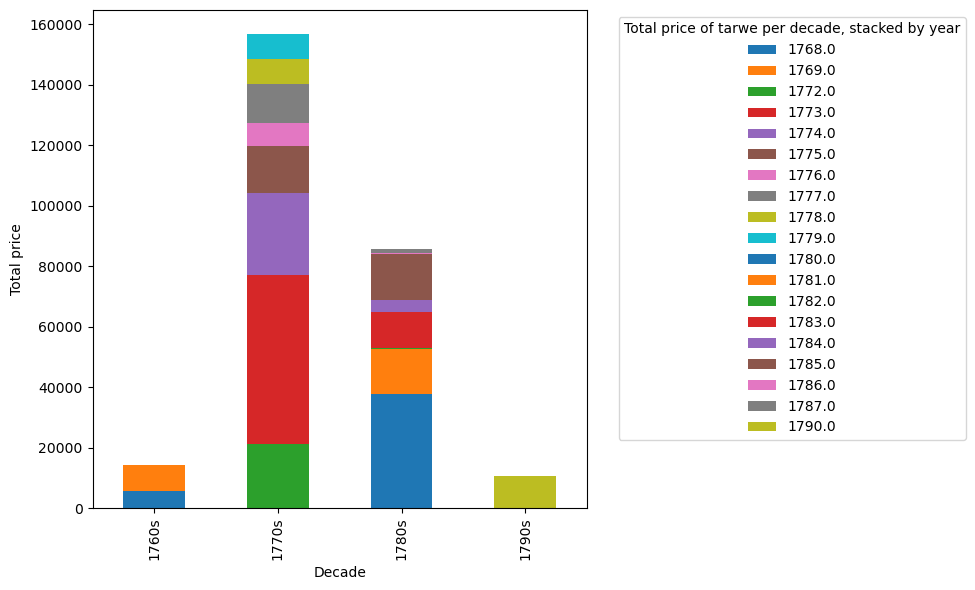

In [107]:
plot_commodity('tarwe')

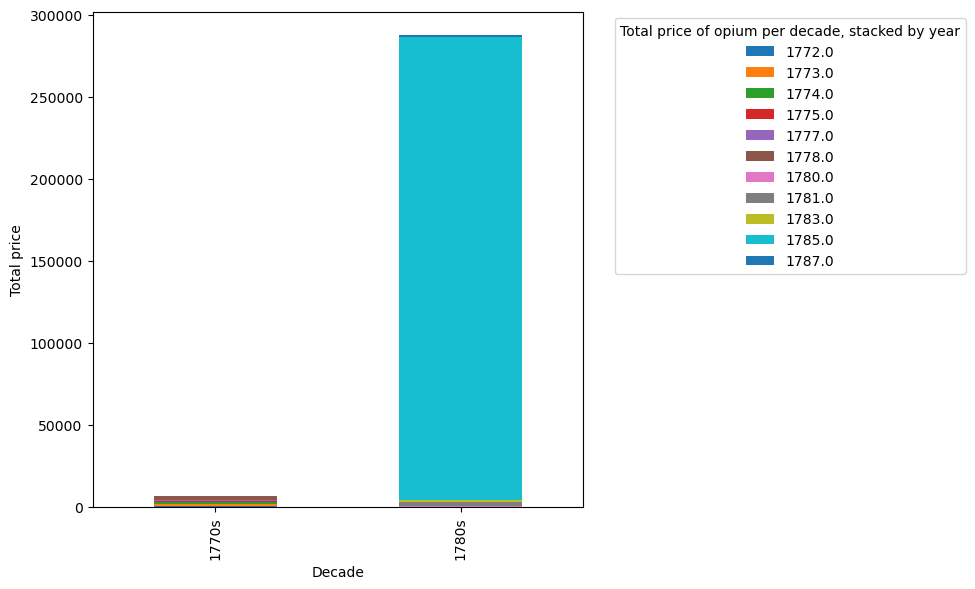

In [104]:
plot_commodity('opium')

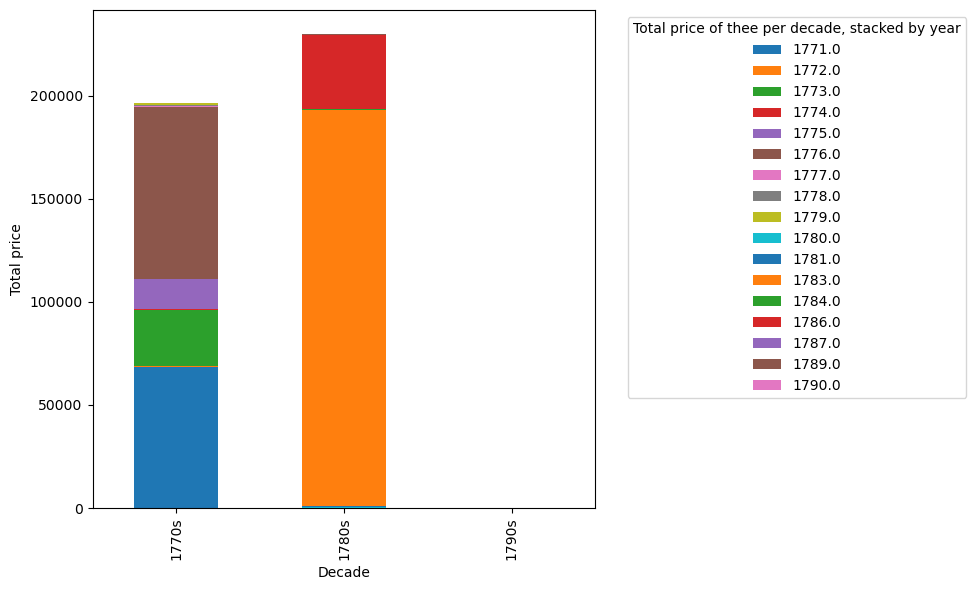

In [105]:
plot_commodity('thee')

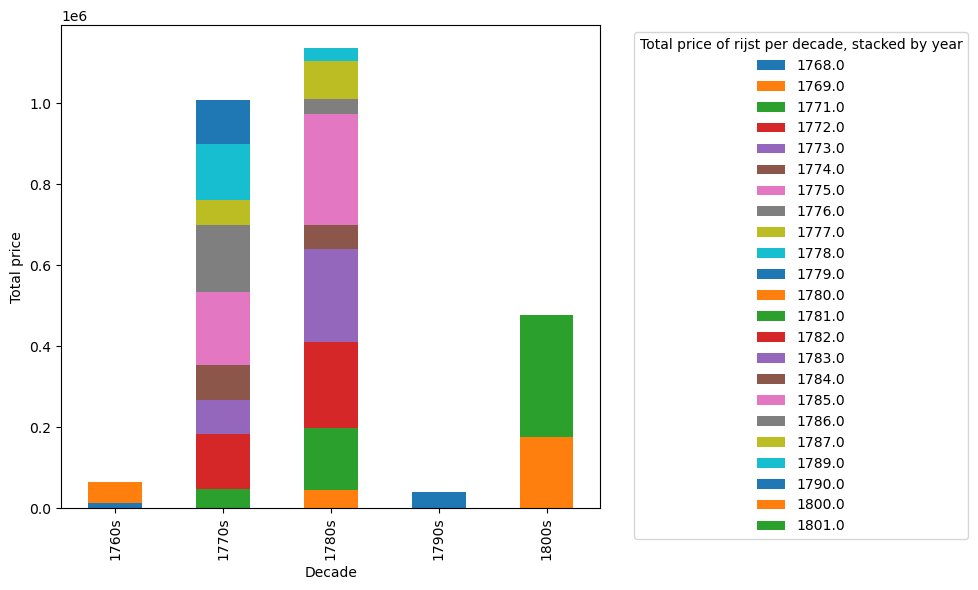

In [100]:
plot_commodity('rijst')

In [ ]:
### OLD CODE BEGINS HERE, REFACTOR OR REMOVE

### Plot commodity change per category <a class="anchor" id="plot-categories"></a>
#### [Go to top](#start)

/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_27077/3315398172.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


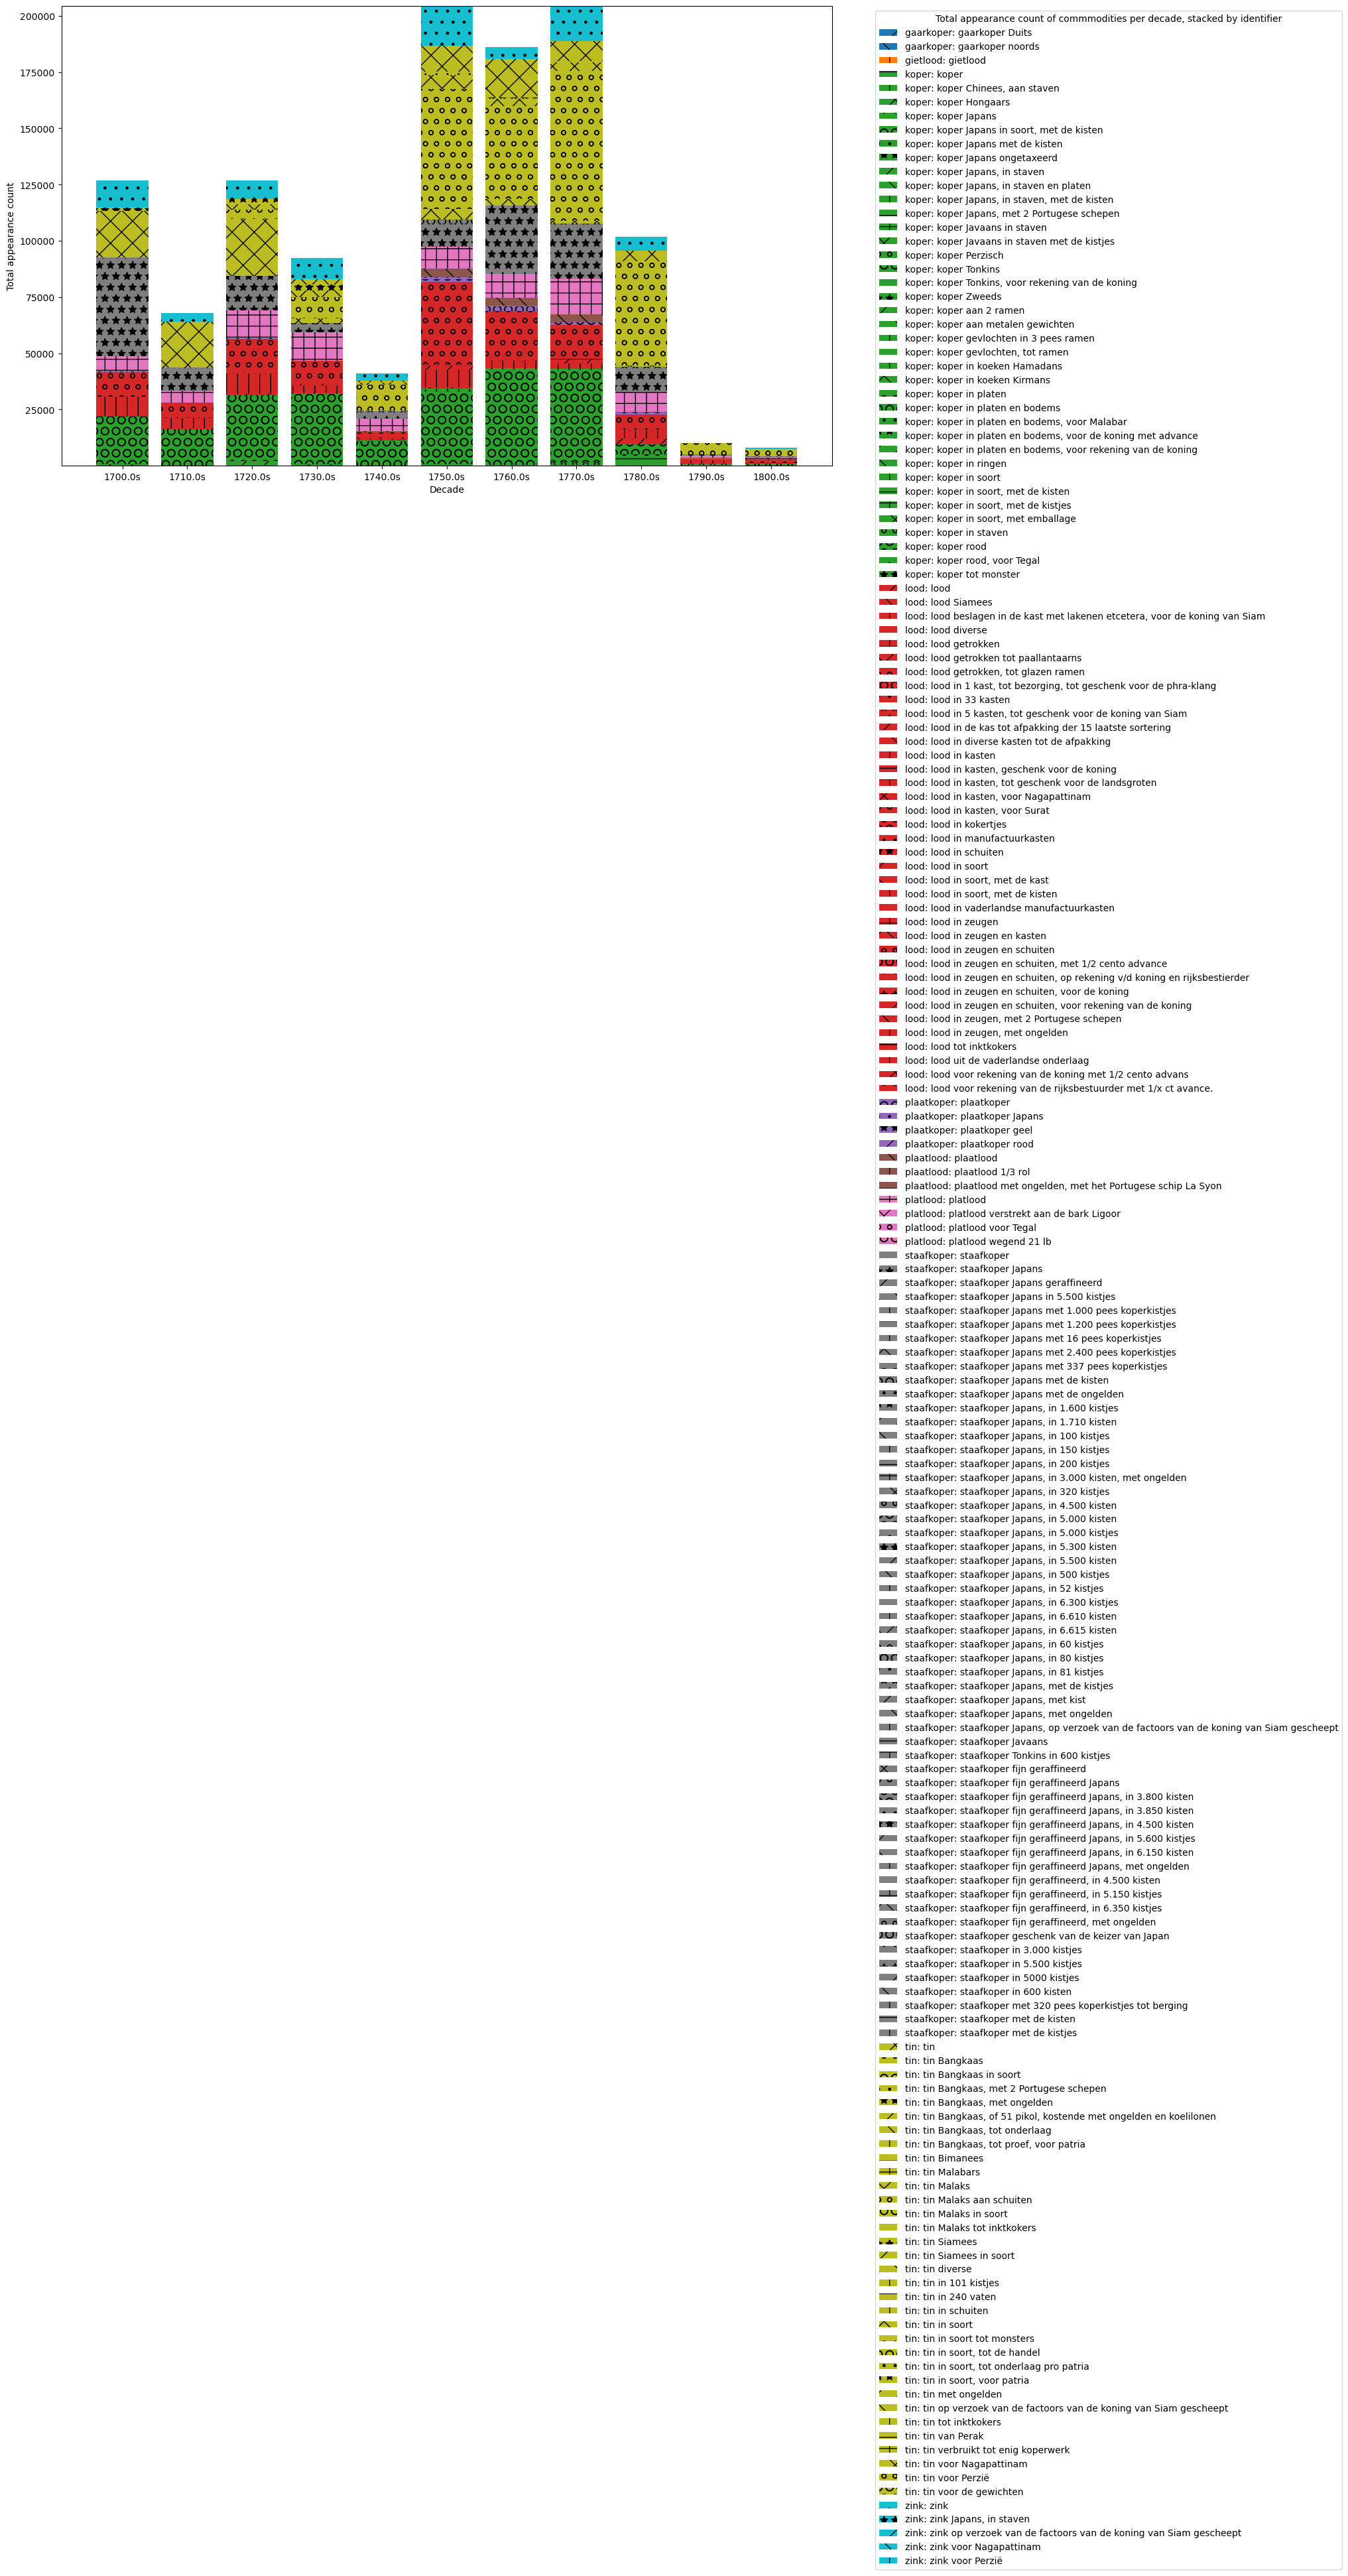

In [91]:
# Look at the most unstable category

df_target = filtered_df[filtered_df['category']=='Non-ferrometalen']
pivot_df = df_target.pivot_table(index='decade', columns=['naam','nameComplete'], values='appearance_count', aggfunc='sum', fill_value=0)

# Define hatch styles
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

# Generate a colour palette with a unique colour per commodity name
unique_names = df_target['naam'].unique()
palette = sns.color_palette("tab10", len(unique_names))  # Using a predefined colour palette
colour_map = dict(zip(unique_names, palette))

# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))
bottom = np.zeros(len(pivot_df))

# Plot each column with different hatches
for i, (naam, nameComplete) in enumerate(pivot_df.columns):
    ax.bar(pivot_df.index, pivot_df[(naam, nameComplete)], bottom=bottom, label=f"{naam}: {nameComplete}",
           color=colour_map[naam], hatch=hatches[i % len(hatches)])
    bottom += pivot_df[(naam, nameComplete)].values

# # Plotting the stacked bar plot
# pivot_df.plot(kind='bar', stacked=True, figsize=(15, 9))

plt.ylabel('Total appearance count')
plt.xlabel('Decade')
plt.legend(title='Commodity with identifier')
plt.legend(title='Total appearance count of commmodities per decade, stacked by identifier',
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()